<a href="https://colab.research.google.com/github/YandaPN/Post-Test-2/blob/main/Posttest2_053.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

# (1) Apriori

Gunakan dataset ini : https://drive.google.com/file/d/1BqC-2d1ZYqFIFwdjdsW5bAAqNFh2AO4C/view?usp=share_link

Dan buatlah daftar support dan confidence untuk 2 item set dengan menggunakan dataset tersebut (hint : buatlah tabel tabulasi terlebih dahulu untuk memudahkan)

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/YandaPN/datasetdm/main/posttest2-_1_.csv") # df untuk membaca file excel dataset.xlsx dengan method read_excel dengan nama sheet DatasetBaru - Sheet1
# Lihat Data Tabular item pada variavel dfa
df

In [ ]:
df.sum() # menghitung jumlah nilai di setiap kolom

In [ ]:
df.columns # mengetahui kolom apa saja yang ada pada dataset

In [ ]:
from itertools import permutations #Library untuk buat kombinasi barang
rules = list(permutations(df.columns, 2)) # untuk menyimpan seluruh kemungkinan kombinasi barang
rules # untuk menampilkan keseluruhan hasil kombinasi

In [ ]:
# Menghitung kemunculan kombinasi yang ada pada dataset
rule_baru = [] # Menyimpan data dalam bentuk list
for rule in rules: # Mengulangi pembacaan dataset
  if len(df[(df[rule[0]]==1) & (df[rule[1]]==1)]) >0: # Menentukan apakah kombinasi tersebut ada atau tidak
    rule_baru.append(rule) # Menyimpan hasil pengecekan dalam bentuk tuple didalam list
rule_baru # Menampilkan hasil

In [ ]:
hitung = {} # Menyimpan data dalam bentuk dictionary
for rule in rule_baru:  # Mengulangi pembacaan dataset
  banyak_data= len(df[
      (df[rule[0]]==1) & (df[rule[1]]==1) # Menentukan berapa jumlah kemunculan kombinasi dan menyimpannya dalam sebuah variabel
      ])
  hitung[str(rule)] = banyak_data # Menambahkan hasil penentuan ke dalam dictionary
hitung # Menampilkan hasil

In [ ]:
# Melihat banyak transaksi
len(df)

In [ ]:
# List support
# 
for item,ab in hitung.items(): # Untuk melakukan perulangan pembacaan dataset pada tiap - tiap kombinasi itemnya
  print(f"{item} support = {ab/len(df)*100}%") # Menghitung support pada tiap tiap kombinasi item dan menampilkannya

In [ ]:
# List Confidens

for item,ab in hitung.items(): # Untuk melakukan perulangan pembacaan dataset pada tiap - tiap kombinasi itemnya
  #"A->B"
  i = eval(item) #Ubah ke list dari string
  print(f"{i[0]}->{i[1]}  Confidence = {ab/df[i[0]].sum()*100}%") # Menghitung confidence pada tiap tiap kombinasi item dan menampilkannya

#(2) KNN

Gunakan dataset ini : https://drive.google.com/file/d/1pXAJZZXCXosf0PTJkyogopKaPFxCYl22/view?usp=share_link

Kemudian buatlah tabel jarak berdasarkan data berikut ini : 

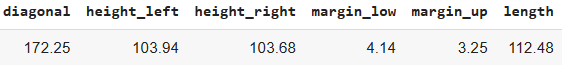
<!-- 1412 -->

### Collect and Describe Data

In [ ]:
df2 = pd.read_csv("https://raw.githubusercontent.com/YandaPN/datasetdm/main/deteksi_uang_palsu.csv")
df2

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,172.06,104.24,103.66,4.24,3.10,113.02
1,True,171.66,103.68,103.41,4.35,3.33,113.74
2,True,172.23,104.00,103.35,4.43,2.95,113.12
3,True,172.07,104.21,103.82,4.29,3.35,113.30
4,True,171.79,104.57,104.04,4.26,3.15,113.46
5,False,172.00,104.23,104.52,5.76,3.37,110.94
6,False,171.56,104.03,103.93,5.47,3.50,111.67
7,False,171.90,104.33,104.40,4.70,3.31,112.12
8,False,171.84,104.06,104.10,4.87,3.25,111.04
9,False,172.11,104.14,104.15,4.84,3.28,110.98


### 1. Membuat tabel jarak berdasarkan data baru yang ingin ditambahkan

In [ ]:
import numpy as np

# membuat dataframe dari data baru
new_data = pd.DataFrame({'diagonal'    : [172.25],
                         'height_left' : [103.94],
                         'height_right': [103.68],
                         'margin_low'  : [4.14],
                         'margin_up'   : [3.25],
                         'length'      : [112.48]})

# menghitung jarak antara setiap baris dataframe utama dengan dataframe data baru
distances = []
for i in range(len(df2)):
    row = df2.iloc[i]
    distance = np.sqrt((row['diagonal'] - new_data['diagonal']) ** 2 +
                       (row['height_left'] - new_data['height_left']) ** 2 +
                       (row['height_right'] - new_data['height_right']) ** 2 +
                       (row['margin_low'] - new_data['margin_low']) ** 2 +
                       (row['margin_up'] - new_data['margin_up']) ** 2 +
                       (row['length'] - new_data['length']) ** 2)
    distances.append(distance)

# Menambahkan kolom distance ke dataframe utama
df2['distance'] = distances

# Menampilkan tabel jarak
print('Tabel Jarak : ')
print(df2['distance'])


Tabel Jarak : 
0    0    0.671267
dtype: float64
1    0    1.458321
dtype: float64
2    0    0.834626
dtype: float64
3    0    0.910934
dtype: float64
4    0    1.312593
dtype: float64
5    0    2.421281
dtype: float64
6    0    1.741896
dtype: float64
7    0    1.113463
dtype: float64
8    0    1.722034
dtype: float64
9    0    1.738217
dtype: float64
Name: distance, dtype: object


### 1.1 Menambahkan Kolom Jarak

In [ ]:
# setting pandas agar bisa menampilkan seluruh kolom dibaris yang sesuai
pd.set_option('display.max_columns', None)

# Mengatur lebar tabel menjadi 200
pd.set_option('display.width', 200)

df2

### 2. Mengurutkan data berdasarkan K jarak terdekat (dengan k = akar 2 dari banyak data)

In [ ]:
# Menghitung jarak antara setiap baris dataframe utama dengan dataframe data baru
df2['distance'] = np.sqrt(
    (df2['diagonal'] - 172.25)**2
    + (df2['height_left'] - 103.94)**2
    + (df2['height_right'] - 103.68)**2
    + (df2['margin_low'] - 4.14)**2
    + (df2['margin_up'] - 3.25)**2
    + (df2['length'] - 112.48)**2
)

# Mengurutkan data dari kecil ke besar dan menentukan data terdekat
k = int(np.sqrt(len(df2)))
data_terdekat = df2.sort_values('distance').head(k)

# Menampilkan data terdekat
print(data_terdekat)


   is_genuine  diagonal  height_left  height_right  margin_low  margin_up  length  distance
0        True    172.06       104.24        103.66        4.24       3.10  113.02  0.671267
2        True    172.23       104.00        103.35        4.43       2.95  113.12  0.834626
3        True    172.07       104.21        103.82        4.29       3.35  113.30  0.910934


### 3.  Menentukan hasil prediksi berdasarkan label terbanyak

In [ ]:
# Mengimpor library sklearn untuk menggunakan algoritma KNN
from sklearn.neighbors import KNeighborsClassifier

# Split data menjadi data training dan data testing
X_train = df2.drop(columns=['is_genuine','distance'],axis=1)
y_train = df2['is_genuine']

# inisiasi data baru menjadi data tes
test_data = new_data

# membuat variabel knn yang berisikan algoritma KNN dengan nilai K = akar 2 dari banyak data
knn = KNeighborsClassifier(n_neighbors=k)

# melatih knn dengan data training
knn.fit(X_train, y_train)

# memprediksi hasil
prediksi = knn.predict(test_data)

print("Berdasarkan jawaban nomor 2, maka hasil prediksinya adalah : True ")
print("Berdasarkan penggunaan library sklearn untuk memprediksi menggunakan Algoritma KNN, hasilnya adalah : "+ ' '.join(map(str, prediksi)))

Berdasarkan jawaban nomor 2, maka hasil prediksinya adalah : True 
Berdasarkan penggunaan library sklearn untuk memprediksi menggunakan Algoritma KNN, hasilnya adalah : True





# (3) Analisis

> Nama : Ryanda Putra Nasrullah

> Nim : 2109116053


Penjelasan posttest : 

Pilihlah salah satu tema dari daftar tema ini :  
1. Perbankan
2. Kesehatan
3. Ritel
4. Pendidkan

Kemudian lakukan analisis dengan menggunakan struktur CRISP-DM

Dimulai dari Business Understanding Hingga Data Preparation 
<img src="https://th.bing.com/th/id/R.f8efea41ae3cd96d86fbc5b10f81ad77?rik=K4Dr%2biIaVGvW8g&riu=http%3a%2f%2fwww.dataprix.com%2ffiles%2fCRISPDM%2fMetodologia_CRISP_DM1_html_52cdbecf.png&ehk=6ONLJMCVxE421Sjt2JJPE6MfCzrL7LLhDZQPdkJTLcw%3d&risl=&pid=ImgRaw&r=0"/>

Tentukan judul dengan ketentuan setiap orang di kelas beda-beda judulnya dan sumber datasetnya (contoh bisa prediksi atau aturan asosiasi)

Catatan : Tugas ini akan berhubungan dengan posttest terakhir (pertemuan 6)

Tema : Kesehatan

Mental  healt  Student

Business Understanding

Dataset yang disediakan adalah dataset mengenai kesehatan mental mahasiswa. Dataset ini terdiri dari 9 variabel, yaitu:

ID: merupakan identitas mahasiswa yang bersangkutan.

Gender: jenis kelamin mahasiswa yang bersangkutan (Laki-laki atau Perempuan).

Age: usia mahasiswa yang bersangkutan.

State: negara bagian di mana universitas mahasiswa tersebut berada.

Semester: semester saat ini yang diambil oleh mahasiswa.

Level of Study: tingkat studi mahasiswa (Undergraduate atau Graduate).

CGPA: indeks prestasi mahasiswa yang dihitung berdasarkan nilai rata-rata yang dicapai selama studi.

Anxiety Level: tingkat kecemasan mahasiswa yang diukur menggunakan skala 1-5.

Sleep Pattern: pola tidur mahasiswa yang diukur menggunakan skala 1-5.

Dari dataset ini, dapat dilakukan beberapa analisis, seperti:

Pengaruh Kecemasan terhadap Kinerja Akademik: Dilakukan analisis untuk melihat apakah terdapat hubungan antara tingkat kecemasan mahasiswa dengan indeks prestasi (CGPA) yang dicapai.

Pengaruh Pola Tidur terhadap Kinerja Akademik: Dilakukan analisis untuk melihat apakah terdapat hubungan antara pola tidur mahasiswa dengan indeks prestasi (CGPA) yang dicapai.

Perbandingan Tingkat Kecemasan dan Pola Tidur: Dilakukan analisis untuk membandingkan tingkat kecemasan dan pola tidur mahasiswa untuk melihat apakah ada pola yang sama atau tidak.

Perbandingan Kecemasan dan Pola Tidur antara Gender: Dilakukan analisis untuk melihat apakah terdapat perbedaan tingkat kecemasan dan pola tidur antara mahasiswa laki-laki dan perempuan.

Perbandingan Kecemasan dan Pola Tidur antara Tingkat Studi: Dilakukan analisis untuk melihat apakah terdapat perbedaan tingkat kecemasan dan pola tidur antara mahasiswa undergraduate dan graduate.

# Analisis dengan menggunakan struktur CRISP-DM

In [11]:
df3 = pd.read_csv("https://raw.githubusercontent.com/YandaPN/datasetdm/main/Student%20Mental%20health.csv")

In [ ]:
df3

In [ ]:
df3.describe()

In [14]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 11 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Timestamp                                     101 non-null    object 
 1   Choose your gender                            101 non-null    object 
 2   Age                                           100 non-null    float64
 3   What is your course?                          101 non-null    object 
 4   Your current year of Study                    101 non-null    object 
 5   What is your CGPA?                            101 non-null    object 
 6   Marital status                                101 non-null    object 
 7   Do you have Depression?                       101 non-null    object 
 8   Do you have Anxiety?                          101 non-null    object 
 9   Do you have Panic attack?                     101 non-null    obj

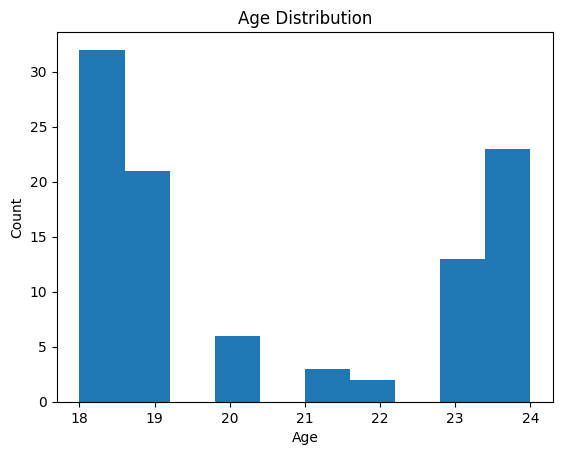

In [17]:
import matplotlib.pyplot as plt
# Visualize Age distribution using histogram
plt.hist(df3['Age'], bins=10)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution')
plt.show()


# Data Prepation

In [19]:
df3.isna().sum()

Timestamp                                       0
Choose your gender                              0
Age                                             1
What is your course?                            0
Your current year of Study                      0
What is your CGPA?                              0
Marital status                                  0
Do you have Depression?                         0
Do you have Anxiety?                            0
Do you have Panic attack?                       0
Did you seek any specialist for a treatment?    0
dtype: int64

In [20]:
df3.drop(columns=["Timestamp"])

,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...
96,Female,21.0,BCS,year 1,3.50 - 4.00,No,No,Yes,No,No
97,Male,18.0,Engineering,Year 2,3.00 - 3.49,No,Yes,Yes,No,No
98,Female,19.0,Nursing,Year 3,3.50 - 4.00,Yes,Yes,No,Yes,No
99,Female,23.0,Pendidikan Islam,year 4,3.50 - 4.00,No,No,No,No,No
